# PHYS 331 - Numerical Techniques for the Sciences I
## Homework 3: Number Representation and Root Finding
### Problem 3 - Visualization of the Bisecton Method (6 pts)
---
Name: *Viktorya Hunanyan*

Onyen: *vhunany*

Cell for *Problem 3* is below.

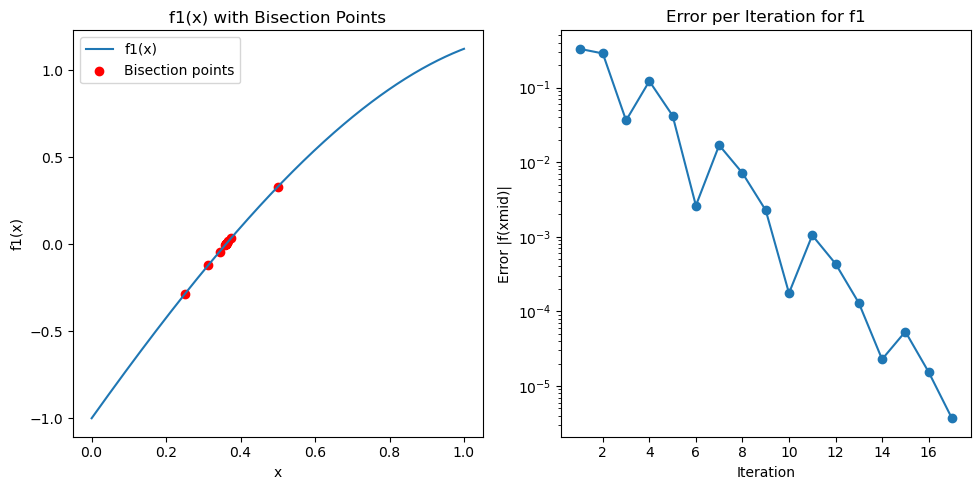

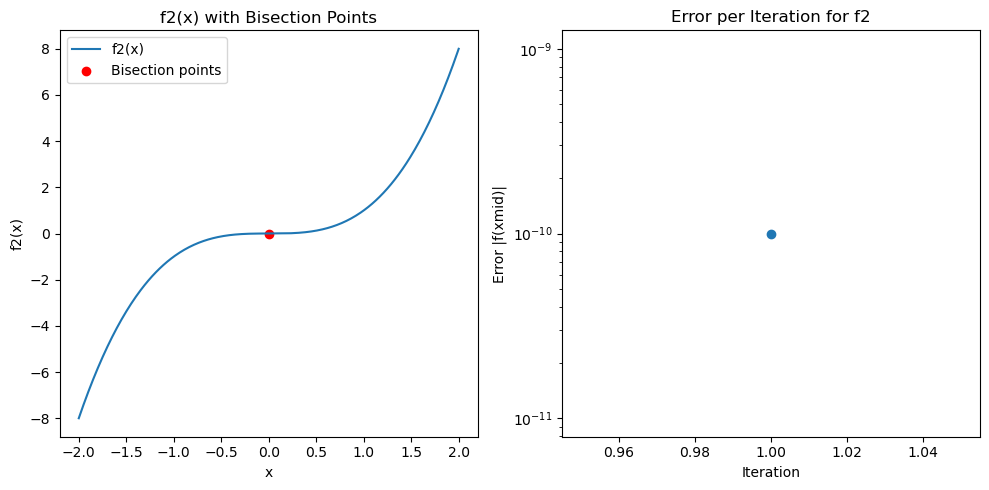

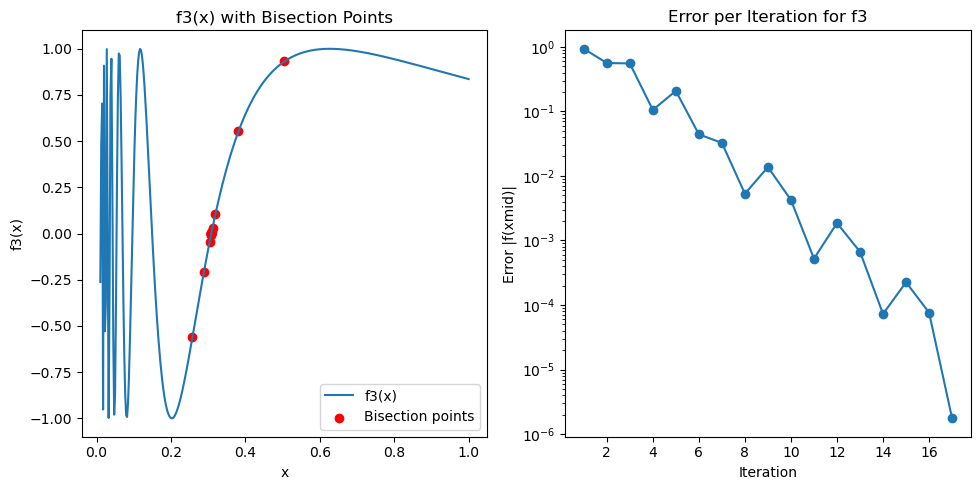

The function must have opposite signs at the bounds x1=0.6, x2=2.
rf_bisect failed for function f4


In [26]:
import numpy as np
import matplotlib.pyplot as plt

def rf_bisect(f, x1, x2, tol, maxiter):
    """Computes the value of the root for function f bracketed in the
    domain [x1, x2] using the bisection method.
    
    Now returns the sequence of midpoints and function values as NumPy arrays.
    """
    f1 = f(x1)
    f2 = f(x2)
    
    if f1 * f2 >= 0:
        print(f"The function must have opposite signs at the bounds x1={x1}, x2={x2}.")
        return (None, None)
    
    xmid_vals = []
    fmid_vals = []
    
    for iters in range(1, maxiter + 1):
        xmid = (x1 + x2) / 2
        fmid = f(xmid)
        
        xmid_vals.append(xmid)
        fmid_vals.append(fmid)
        
        if abs(fmid) < tol or abs(x2 - x1) / 2 < tol:
            return (np.array(xmid_vals), np.array(fmid_vals))
        
        if f1 * fmid < 0:
            x2 = xmid
        else:
            x1 = xmid
            f1 = fmid
    
    return (np.array(xmid_vals), np.array(fmid_vals))

# Functions f1, f2, f3, and f4 that may be used to test your implementation
# of rf_bisect.
def f1(x):
    return 3 * x + np.sin(x) - np.exp(x)

def f2(x):
    return x**3

def f3(x):
    return np.sin(1. / (x + 0.01))

def f4(x):
    return 1. / (x - 0.5)

def main_a():
    functions = [f1, f2, f3, f4]
    x_ranges = [(0, 1), (-2, 2), (0.01, 1), (0.6, 2)]
    tol = 1e-5
    maxiter = 50
    
    for i, (f, (x1, x2)) in enumerate(zip(functions, x_ranges), 1):
        result = rf_bisect(f, x1, x2, tol, maxiter)
        
        if result[0] is None:  # Check if rf_bisect failed
            print(f"rf_bisect failed for function f{i}")
            continue
        
        xmid_vals, fmid_vals = result
        
        # Plot f(x) and (xmid, fmid) points
        x_vals = np.linspace(x1, x2, 400)
        f_vals = f(x_vals)
        
        plt.figure(figsize=(10, 5))
        
        # Plot the function
        plt.subplot(1, 2, 1)
        plt.plot(x_vals, f_vals, label=f'f{i}(x)')
        plt.scatter(xmid_vals, fmid_vals, color='red', label='Bisection points')
        plt.xlabel('x')
        plt.ylabel(f'f{i}(x)')
        plt.title(f'f{i}(x) with Bisection Points')
        plt.legend()
        
        # Plot error vs. iterations
        plt.subplot(1, 2, 2)
        errors = np.abs(fmid_vals)
        
        # Avoid zero or near-zero values for log scale
        errors[errors == 0] = 1e-10  # Replace zeros with small positive values

        plt.plot(range(1, len(errors) + 1), errors, marker='o')
        plt.yscale('log')
        plt.xlabel('Iteration')
        plt.ylabel('Error |f(xmid)|')
        plt.title(f'Error per Iteration for f{i}')
        
        plt.tight_layout()
        plt.show()

# Call the main function
main_a()
